In [1]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import os
import tensorflow as tf

import random
random.seed(42)

2025-07-15 12:27:41.808230: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752607661.822275  125991 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752607661.826547  125991 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752607661.839181  125991 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752607661.839196  125991 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752607661.839198  125991 computation_placer.cc:177] computation placer alr

In [2]:
# minorized reference
with h5py.File('/global/u2/k/kberard/SCGSR/Research/Diamond/Data/density_tot_ref.h5', 'r') as file:
    #print("Keys: %s" % file.keys())
    ref_d = file['density'][:]
#print(ref_d)
print(ref_d.shape)
minorized_ref_d = (np.sum(ref_d,axis=2))
minorized_ref_d.shape



(64, 64, 64)


(64, 64)

In [3]:
####################################################################################################################################################
def stochastic_density(d,N):
    # poisson model
    #  accurate and fast for all values of N
    # N  = number of MC samples
    assert isinstance(d,np.ndarray)
    assert isinstance(N,(int,float,np.int64,np.float64))
    assert N>0
    ds = np.random.poisson(N*d)/N
    ds*= d.sum()/ds.sum()
    return ds
#end def stochastic_density

####################################################################################################################################################

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  4


In [5]:
n_s = [1,5,10,50,100,500,1000,5000,10000]
print(n_s[1])


5


1
Train, val, test generated
here
2 norm difference
Mean vs DFT 2 norm diff
0.0012731647688404833
divergence difference


I0000 00:00:1752607870.765142  125991 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38366 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
I0000 00:00:1752607870.766826  125991 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38366 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1752607870.768509  125991 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38366 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:82:00.0, compute capability: 8.0
I0000 00:00:1752607870.770095  125991 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 38366 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


JSD (bar{x_test},y_dft): tf.Tensor(1.507066e-05, shape=(), dtype=float32)
Epoch 1/100


I0000 00:00:1752607873.042101  127983 service.cc:152] XLA service 0x7f54f00056d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752607873.042127  127983 service.cc:160]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1752607873.042132  127983 service.cc:160]   StreamExecutor device (1): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1752607873.042134  127983 service.cc:160]   StreamExecutor device (2): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1752607873.042135  127983 service.cc:160]   StreamExecutor device (3): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
2025-07-15 12:31:13.082293: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752607873.338864  127983 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-15 12:31:15.368295: I external/local_xla

 78/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0487  

I0000 00:00:1752607879.256061  127983 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0486 - val_loss: 0.0474
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0408 - val_loss: 0.0032
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 9.6110e-04
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8655e-04 - val_loss: 7.5677e-04
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3825e-04 - val_loss: 6.9827e-04
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9057e-04 - val_loss: 6.7415e-04
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7027e-04 - val_loss: 6.6233e-04
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6039e-04 - val_loss: 6.5584e-04
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5436e-04 - val_loss: 6.5202e-04
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5181e-04 - val_loss: 6.4947e-04
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4884e-04 - val_l

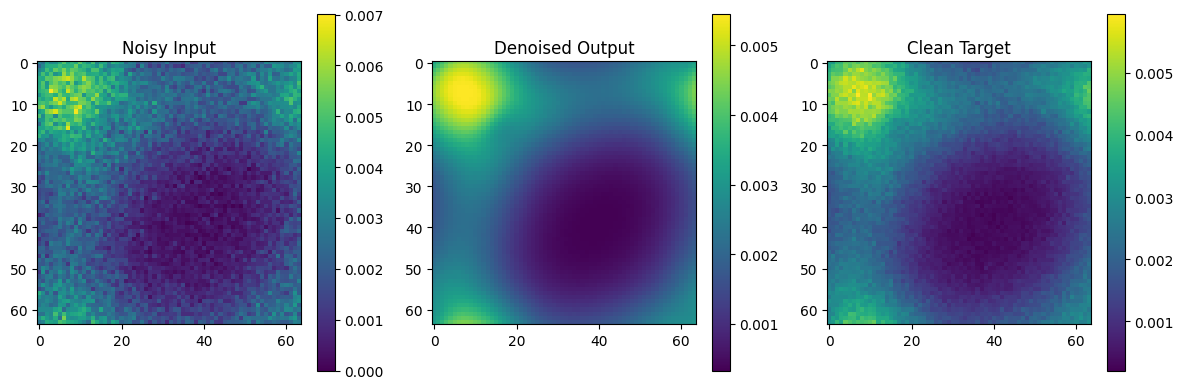


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0179 - val_loss: 6.6085e-04 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.5462e-04 - val_loss: 6.4705e-04 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.4872e-04 - val_loss: 6.4547e-04 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.4949e-04 - val_loss: 6.4385e-04 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.4692e-04 - val_loss: 6.5419e-04 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/100
157/157 ━━━

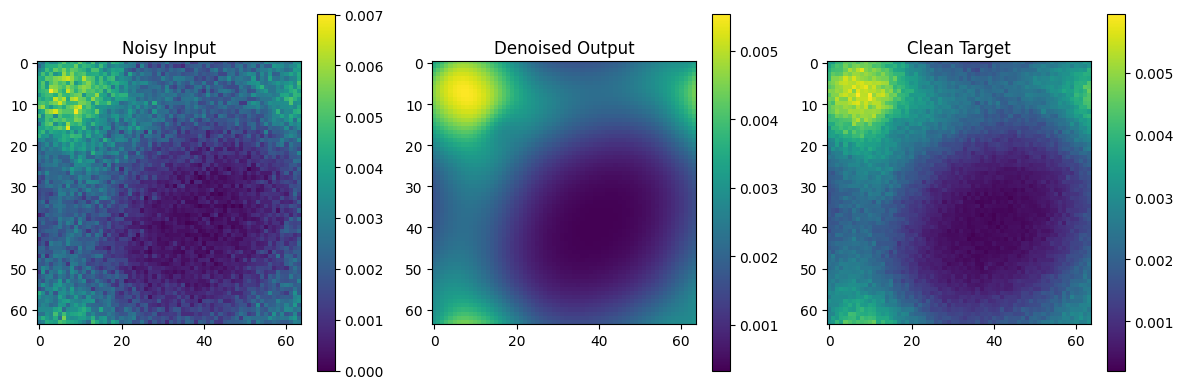

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - loss: 0.0083 - val_loss: 0.0432
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7.1118e-04 - val_loss: 0.0332
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.7219e-04 - val_loss: 0.0172
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.7555e-04 - val_loss: 0.0018
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.5808e-04 - val_loss: 6.6127e-04
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.6027e-04 - val_loss: 6.5892e-04
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.5618e-04 - val_loss: 6.6970e-04
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.6106e-04 - val_loss: 6.6179e-04
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.5327e-04 - val_loss: 6.4839e-04
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.5506e-04 - val_loss: 6.4718e-04
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - l

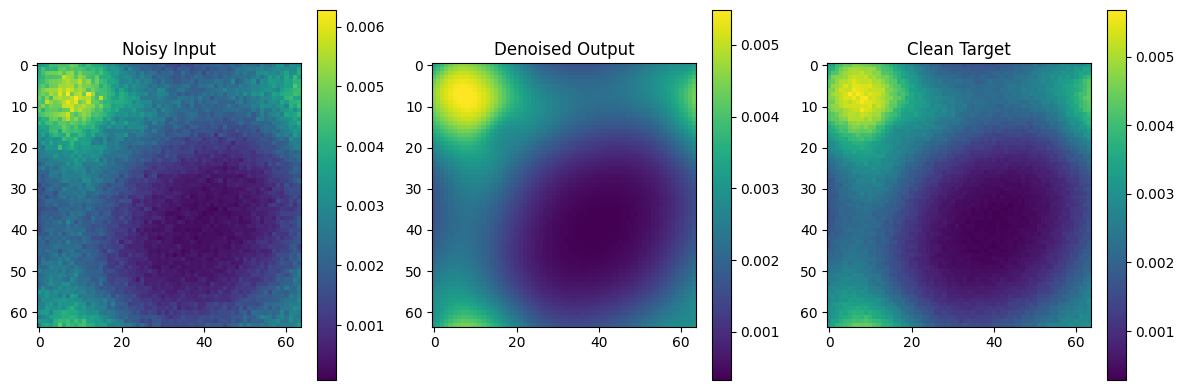


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0141 - val_loss: 1.7233e-04 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5604e-04 - val_loss: 1.5412e-04 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4536e-04 - val_loss: 1.3273e-04 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3637e-04 - val_loss: 1.3400e-04 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3572e-04 - val_loss: 1.3603e-04 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/100
157/157 ━━━━

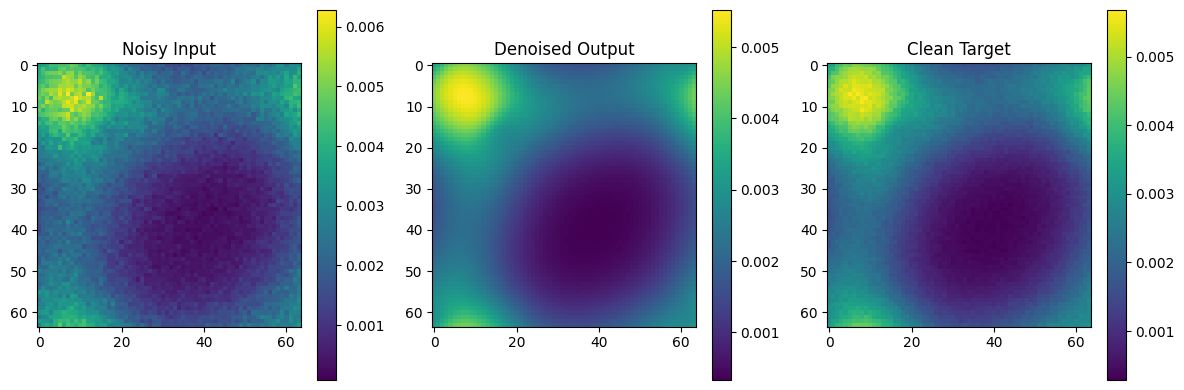

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - loss: 0.0036 - val_loss: 0.0439
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.6896e-04 - val_loss: 0.0369
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.5311e-04 - val_loss: 0.0252
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.5020e-04 - val_loss: 0.0069
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4521e-04 - val_loss: 8.5590e-04
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4340e-04 - val_loss: 1.3932e-04
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4193e-04 - val_loss: 1.3798e-04
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4219e-04 - val_loss: 1.5135e-04
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4184e-04 - val_loss: 1.4841e-04
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4106e-04 - val_loss: 1.3493e-04
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - l

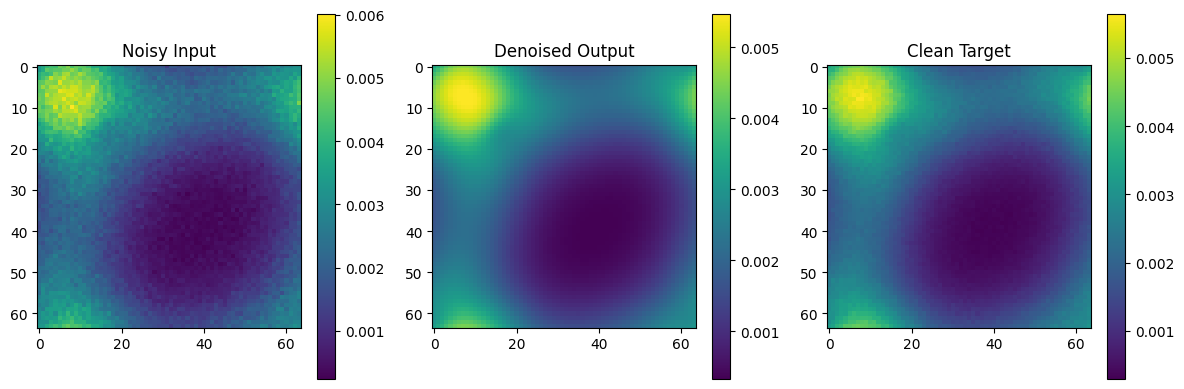


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.0159 - val_loss: 8.4935e-05 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.3335e-05 - val_loss: 7.4747e-05 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.1181e-05 - val_loss: 6.8168e-05 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.3827e-05 - val_loss: 6.6431e-05 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.9871e-05 - val_loss: 6.6155e-05 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/100
157/157 ━━━━

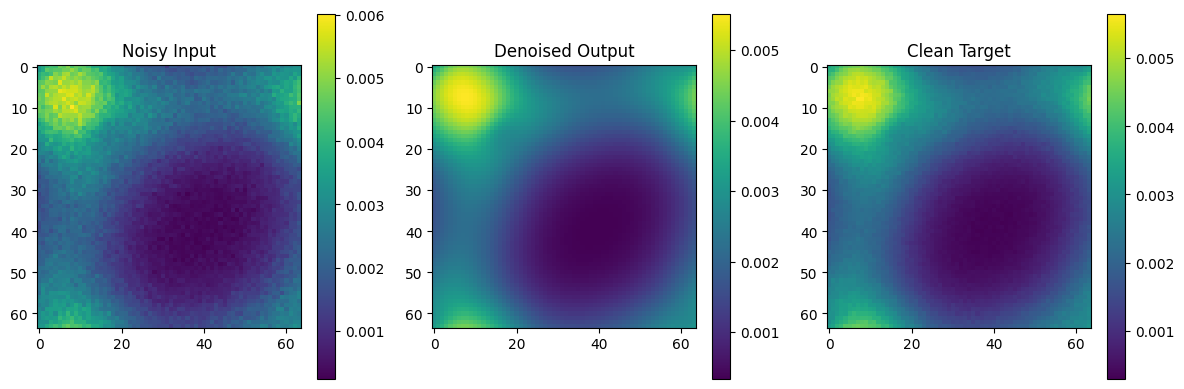

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - loss: 0.0065 - val_loss: 0.0452
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.6653e-05 - val_loss: 0.0401
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8.7228e-05 - val_loss: 0.0267
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8.2191e-05 - val_loss: 0.0089
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8.0189e-05 - val_loss: 4.8641e-04
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7.9566e-05 - val_loss: 7.5673e-05
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7.7053e-05 - val_loss: 1.4052e-04
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 7.5444e-05 - val_loss: 2.9253e-04
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 7.6528e-05 - val_loss: 1.1115e-04
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 7.4604e-05 - val_loss: 1.5184e-04
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - l

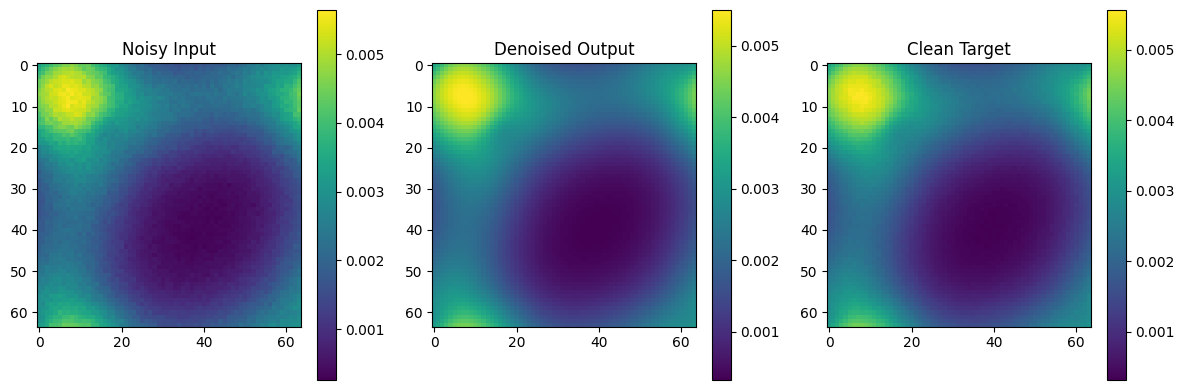


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.0158 - val_loss: 1.1729e-04 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0280e-04 - val_loss: 4.1183e-05 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.7190e-05 - val_loss: 1.9954e-05 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.4400e-05 - val_loss: 1.7004e-05 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6827e-05 - val_loss: 1.6175e-05 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/100
157/157 ━━━━

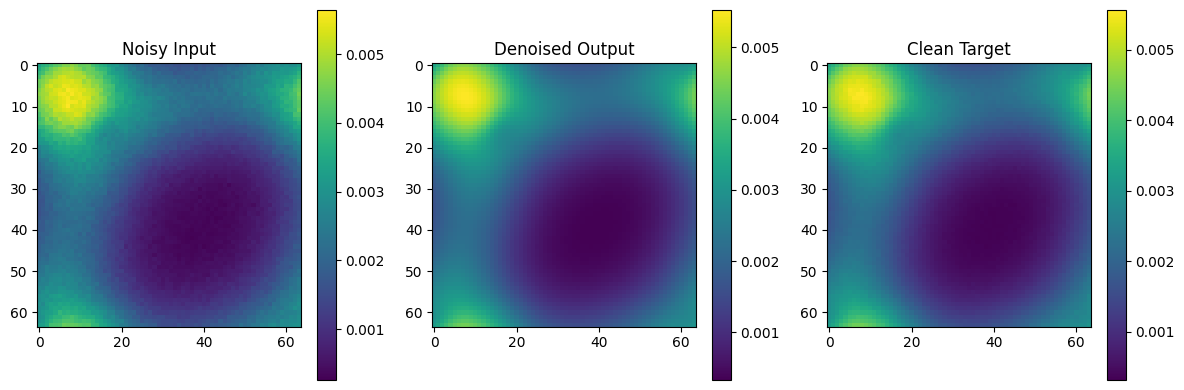

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - loss: 0.0048 - val_loss: 0.0452
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.7481e-05 - val_loss: 0.0387
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.1057e-05 - val_loss: 0.0263
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.2502e-05 - val_loss: 0.0095
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.3262e-05 - val_loss: 0.0012
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.5111e-05 - val_loss: 8.0375e-05
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.0804e-05 - val_loss: 1.6678e-05
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.3063e-05 - val_loss: 5.1284e-05
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.7743e-05 - val_loss: 1.5780e-05
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.9380e-05 - val_loss: 4.6943e-05
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss:

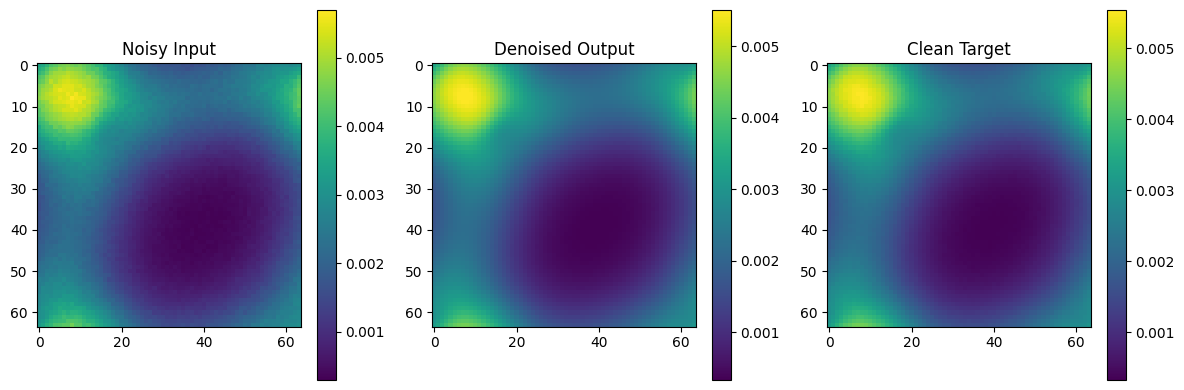


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0139 - val_loss: 2.9616e-05 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.1209e-05 - val_loss: 1.5272e-05 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3749e-05 - val_loss: 6.1892e-05 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8322e-05 - val_loss: 8.4557e-06 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.2812e-06 - val_loss: 8.2260e-06 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/100
157/157 ━━━━

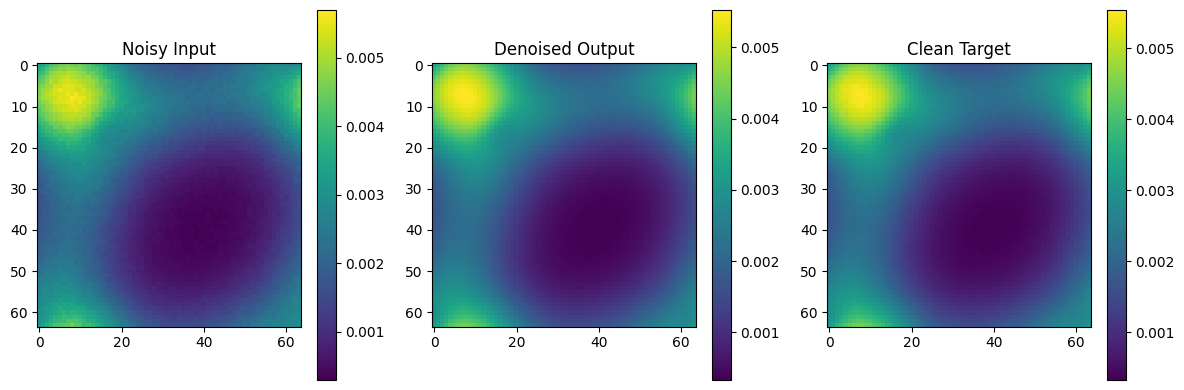

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - loss: 0.0043 - val_loss: 0.0451
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.2886e-05 - val_loss: 0.0400
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4317e-05 - val_loss: 0.0272
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.7287e-05 - val_loss: 0.0099
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.7202e-05 - val_loss: 8.9379e-04
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4244e-05 - val_loss: 1.9471e-05
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.6374e-05 - val_loss: 3.2350e-05
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.2457e-05 - val_loss: 5.6478e-05
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.2945e-05 - val_loss: 3.1222e-05
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.5963e-05 - val_loss: 5.0173e-05
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - l

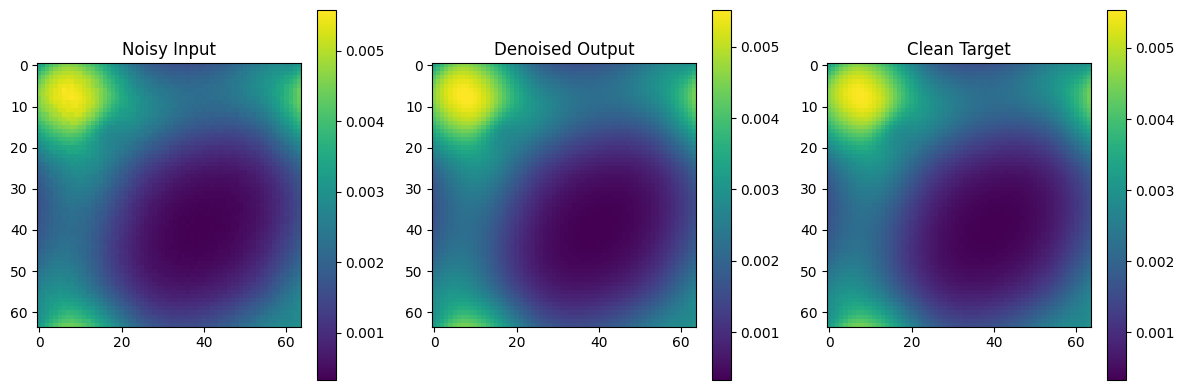


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0139 - val_loss: 3.2996e-05 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3375e-05 - val_loss: 9.9227e-06 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2259e-05 - val_loss: 6.2781e-06 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5520e-05 - val_loss: 4.2752e-05 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.9351e-06 - val_loss: 1.5636e-05 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/100
157/157 ━━━━

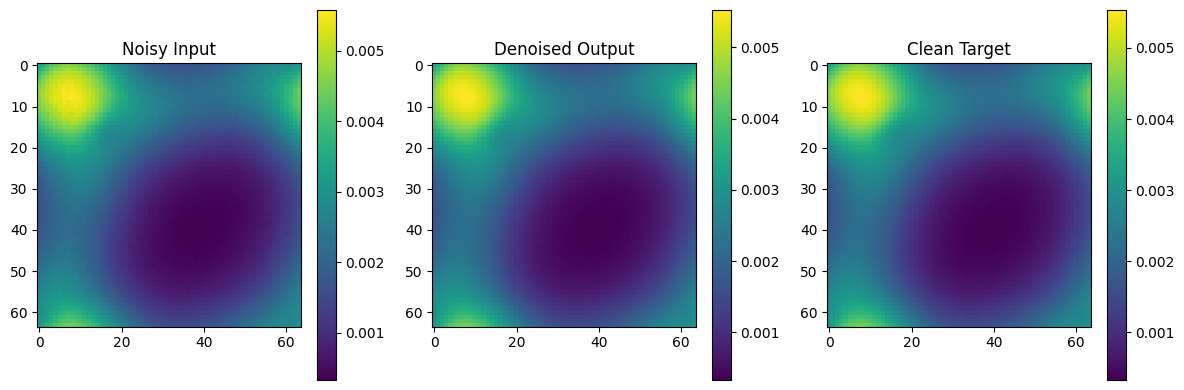

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - loss: 0.0045 - val_loss: 0.0455
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.1705e-05 - val_loss: 0.0405
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7.8146e-06 - val_loss: 0.0283
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.1009e-05 - val_loss: 0.0097
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4240e-05 - val_loss: 0.0011
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 9.1253e-06 - val_loss: 1.6970e-05
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 7.7231e-06 - val_loss: 3.9642e-05
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.3363e-06 - val_loss: 1.2438e-05
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 8.7915e-06 - val_loss: 1.7826e-05
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.3069e-06 - val_loss: 7.3055e-06
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss:

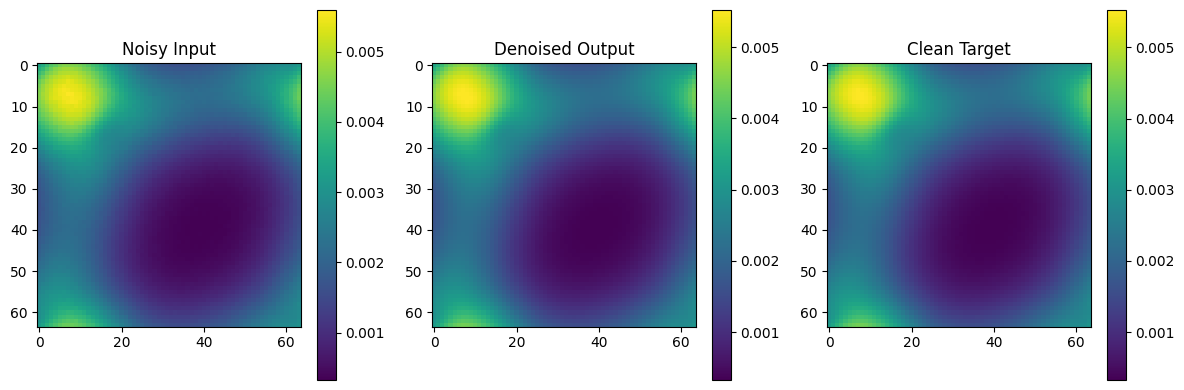


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0139 - val_loss: 6.3713e-05 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3638e-05 - val_loss: 1.5384e-05 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.1725e-05 - val_loss: 1.7597e-05 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5209e-05 - val_loss: 4.0365e-06 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3449e-05 - val_loss: 5.2358e-06 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/100
157/157 ━━━━

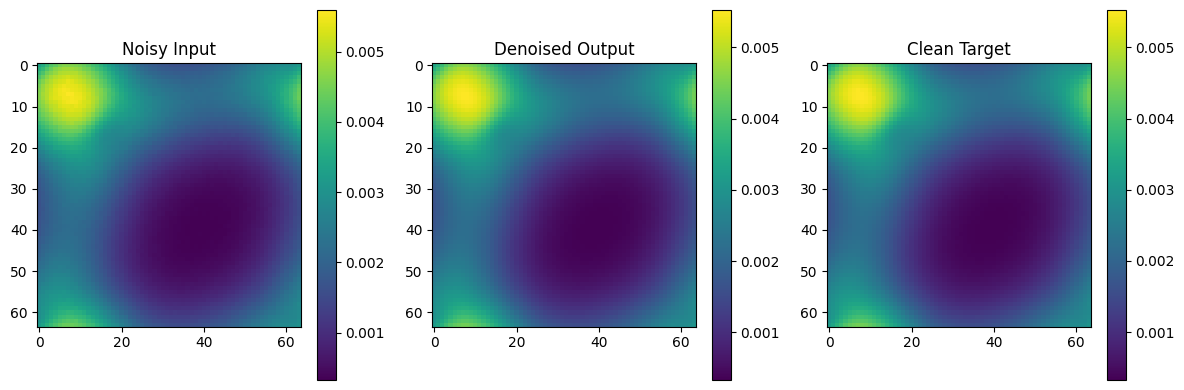

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - loss: 0.0034 - val_loss: 0.0450
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.7441e-05 - val_loss: 0.0393
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.2055e-05 - val_loss: 0.0283
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4942e-05 - val_loss: 0.0104
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.6325e-06 - val_loss: 0.0011
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.7296e-06 - val_loss: 4.6166e-05
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.2295e-06 - val_loss: 2.1488e-06
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.6397e-06 - val_loss: 2.9870e-05
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4.4591e-06 - val_loss: 6.8699e-05
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8.2264e-06 - val_loss: 1.3022e-05
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss:

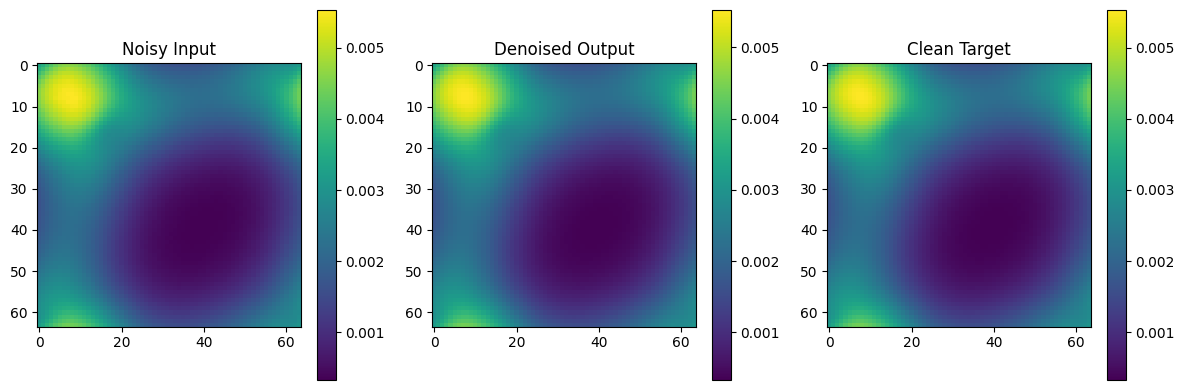


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0154 - val_loss: 4.4371e-05 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.5277e-05 - val_loss: 1.2588e-05 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8363e-05 - val_loss: 7.2197e-06 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.2022e-05 - val_loss: 4.0970e-06 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.3685e-06 - val_loss: 1.1484e-05 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/100
157/157 ━━━━

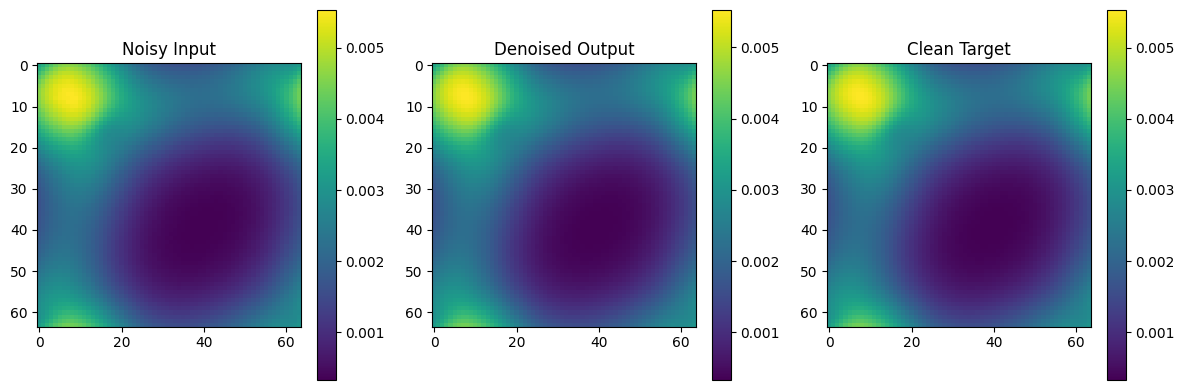

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - loss: 0.0051 - val_loss: 0.0440
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8.1215e-06 - val_loss: 0.0393
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4.5692e-06 - val_loss: 0.0268
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.2527e-05 - val_loss: 0.0092
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.8528e-06 - val_loss: 0.0011
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.9201e-06 - val_loss: 6.0557e-06
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.7322e-06 - val_loss: 1.1186e-05
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4485e-05 - val_loss: 2.7725e-05
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.7556e-06 - val_loss: 1.8365e-05
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.5115e-06 - val_loss: 2.6966e-05
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss:

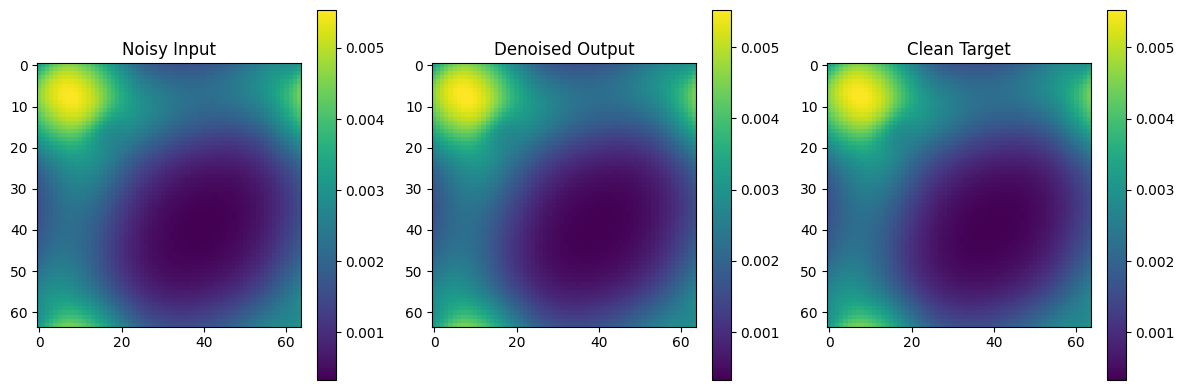


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0142 - val_loss: 2.1885e-05 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4297e-05 - val_loss: 6.2267e-06 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.7062e-06 - val_loss: 3.6458e-06 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.4848e-06 - val_loss: 2.3503e-06 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.6374e-06 - val_loss: 1.6814e-06 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/100
157/157 ━━━━

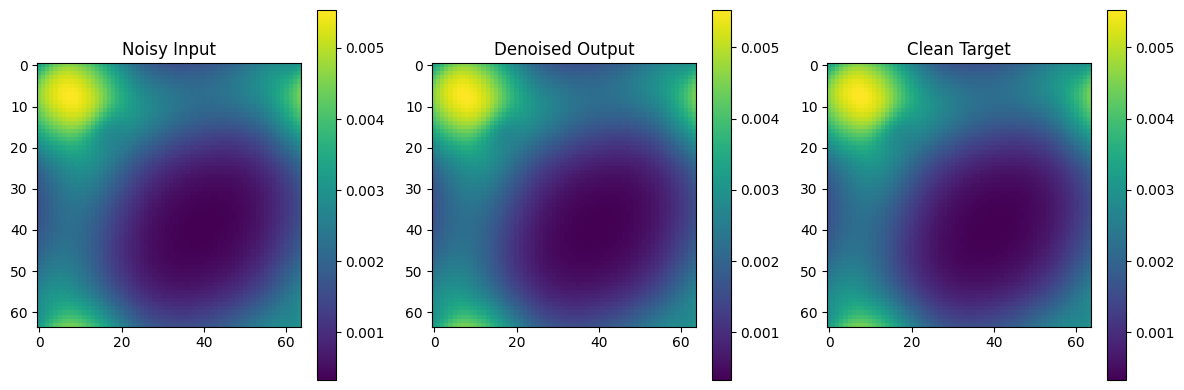

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 0.0045 - val_loss: 0.0451
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.0352e-05 - val_loss: 0.0383
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.5594e-05 - val_loss: 0.0243
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.6936e-06 - val_loss: 0.0082
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.9203e-06 - val_loss: 6.9889e-04
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.4403e-06 - val_loss: 6.0423e-06
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.2818e-05 - val_loss: 6.4707e-05
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.0637e-06 - val_loss: 2.0158e-04
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.6111e-06 - val_loss: 4.0959e-05
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.9713e-06 - val_loss: 5.4223e-05
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - l

In [6]:
def generate_single_2d_density(ref_d, noise_level):
    noisy_3d = stochastic_density(ref_d, noise_level)  # shape: (64, 64, 64)
    projected_2d = np.sum(noisy_3d, axis=2)             # shape: (64, 64)
    return projected_2d
for mul in (n_s):
    print(mul)
    #!!!!!!!!!!!!!!!!!!! adjust these values to cahnge value range for JSD
    # Noise levels to randomly draw from
    noise_levels = [1000*mul * (j + 1) for j in range(5)] 
    #set y noise for comparison
    test_noise = 10000*mul
    y_noise = 100000*mul
    # Sizes
    num_train = 5000
    num_val = 1000
    num_test = 500
    
    num_samples = 0 
    
    # Generate train set with mixed noise levels
    x_train = np.zeros((num_train, 64, 64))
    for i in range(num_train):
        noise_level = np.random.choice(noise_levels)
        num_samples+=noise_level
        x_train[i] = generate_single_2d_density(ref_d, noise_level)
        
    
    # Generate val set with mixed noise levels
    x_val = np.zeros((num_val, 64, 64))
    for i in range(num_val):
        noise_level = np.random.choice(noise_levels)
        num_samples+=noise_level
        x_val[i] = generate_single_2d_density(ref_d, noise_level)
    
    # Generate test set with fixed noise level
    x_test = np.zeros((num_test, 64, 64))
    for i in range(num_test):
        x_test[i] = generate_single_2d_density(ref_d, test_noise)
        num_samples+=test_noise
    
    print("Train, val, test generated")
    
    
    # Average over all
    
    total_ex = num_train + num_val + num_test
    train_sum = np.sum(x_train, axis=0)
    val_sum = np.sum(x_val, axis=0)
    test_sum = np.sum(x_test, axis=0)
    AVG_TOTAL = (train_sum + val_sum + test_sum) / total_ex
    
    np.save(str(num_samples)+'_sample_density', AVG_TOTAL)
    
    y_test_3d = np.zeros((x_test.shape[0],64,64,64))
    y_train_3d = np.zeros((x_train.shape[0],64,64,64))
    y_val_3d = np.zeros((x_val.shape[0],64,64,64))
    for i in range (y_test_3d.shape[0]):
        y_test_3d[i]=stochastic_density(ref_d,y_noise)
    y_test = (np.sum(y_test_3d,axis=2))
    
    for i in range (y_train_3d.shape[0]):
        y_train_3d[i]=stochastic_density(ref_d,y_noise)
    y_train = (np.sum(y_train_3d,axis=2))
    
    for i in range (y_val_3d.shape[0]):
        y_val_3d[i]=stochastic_density(ref_d,y_noise)
    y_val = (np.sum(y_val_3d,axis=2))
    print("here")
    # Add channel dimension
    x_train = x_train[..., np.newaxis]
    x_val   = x_val[..., np.newaxis]
    x_test  = x_test[..., np.newaxis]
    
    y_train = y_train[..., np.newaxis]
    y_val   = y_val[..., np.newaxis]
    y_test   = y_test[..., np.newaxis]
    import tensorflow as tf
    
    def jensen_shannon_divergence_loss(y_true, y_pred):
        y_t = tf.cast(y_true, tf.float32)
        y_p = tf.cast(y_pred, tf.float32)
    
        y_t = tf.reshape(y_t, [tf.shape(y_t)[0], -1])
        y_p = tf.reshape(y_p, [tf.shape(y_p)[0], -1])
    
        y_t /= tf.reduce_sum(y_t, axis=1, keepdims=True) + 1e-8
        y_p /= tf.reduce_sum(y_p, axis=1, keepdims=True) + 1e-8
    
        m = 0.5 * (y_t + y_p)
    
        kl_true = tf.reduce_sum(y_t * tf.math.log((y_t + 1e-8) / (m + 1e-8)), axis=1)
        kl_pred = tf.reduce_sum(y_p * tf.math.log((y_p + 1e-8) / (m + 1e-8)), axis=1)
    
        jsd = 0.5 * (kl_true + kl_pred)
    
        return tf.reduce_mean(jsd)
    # must beat the model predicting the average
    test_avg = np.mean(x_test[:,:,:,0],axis=0)
    print("2 norm difference")
    print("Mean vs DFT 2 norm diff")
    print(np.linalg.norm(test_avg-minorized_ref_d))
    
    
    print("divergence difference")              
    print("JSD (bar{x_test},y_dft):", jensen_shannon_divergence_loss(test_avg, minorized_ref_d.copy()))
    
    # should be on the order of 1.4 10^-5
    import numpy as np
    import tensorflow as tf
    from tensorflow.keras import layers, models, callbacks
    import matplotlib.pyplot as plt
    from tensorflow.keras.utils import register_keras_serializable
    
    
    # --- Custom Renormalization Layer ---
    @register_keras_serializable(package="Custom")
    class Renormalize(tf.keras.layers.Layer):
        def __init__(self, target_sum=8.0, **kwargs):
            super().__init__(**kwargs)
            self.target_sum = target_sum
    
        def call(self, inputs):
            x_sum = tf.reduce_sum(inputs, axis=[1, 2, 3], keepdims=True)
            return inputs / (x_sum + 1e-8) * self.target_sum
    
        def get_config(self):
            config = super().get_config()
            config.update({'target_sum': self.target_sum})
            return config
    
    
    # --- Custom JS Divergence Loss ---
    @register_keras_serializable(package="Custom")
    
    
    def jensen_shannon_divergence_loss(y_true, y_pred):
        y_t = tf.cast(y_true, tf.float32)
        y_p = tf.cast(y_pred, tf.float32)
    
        y_t = tf.reshape(y_t, [tf.shape(y_t)[0], -1])
        y_p = tf.reshape(y_p, [tf.shape(y_p)[0], -1])
    
        y_t /= tf.reduce_sum(y_t, axis=1, keepdims=True) + 1e-8
        y_p /= tf.reduce_sum(y_p, axis=1, keepdims=True) + 1e-8
    
        m = 0.5 * (y_t + y_p)
    
        kl_true = tf.reduce_sum(y_t * tf.math.log((y_t + 1e-8) / (m + 1e-8)), axis=1)
        kl_pred = tf.reduce_sum(y_p * tf.math.log((y_p + 1e-8) / (m + 1e-8)), axis=1)
    
        jsd = 0.5 * (kl_true + kl_pred)
    
        return tf.reduce_mean(jsd)
    
    
    # --- Create DAE Model ---
    def create_dae(input_shape):
        flat_dim = np.prod(input_shape)
        model = tf.keras.Sequential([
            layers.Input(shape=input_shape),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(16, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(flat_dim, activation='sigmoid'),
            layers.Reshape(target_shape=input_shape),
            Renormalize(target_sum=8.0)  # Use the custom layer here
        ])
        return model
    
    
    # --- Main ---
    if __name__ == '__main__':
        input_shape = (64, 64, 1)
    
        dae = create_dae(input_shape)
        dae.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                    loss=jensen_shannon_divergence_loss)
    
        early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        dae.fit(x_train.copy(), y_train.copy(),
                validation_data=(x_val.copy(), y_val.copy()),
                epochs=100,
                batch_size=50,
                callbacks=[early_stop],
                verbose=1)
    
        # --- Predict and Plot ---
        i = 0
        denoised_norm = dae.predict(x_test.copy()[i:i+1])[0, ..., 0]
        denoised = denoised_norm
        noisy_input = x_test.copy()[i, ..., 0]
        true_clean = y_test.copy()[i, ..., 0]
    
        plt.figure(figsize=(12, 4))
    
        plt.subplot(1, 3, 1)
        plt.imshow(noisy_input, cmap='viridis')
        plt.title("Noisy Input")
        plt.colorbar()
    
        plt.subplot(1, 3, 2)
        plt.imshow(denoised, cmap='viridis')
        plt.title("Denoised Output")
        plt.colorbar()
    
        plt.subplot(1, 3, 3)
        plt.imshow(true_clean, cmap='viridis')
        plt.title("Clean Target")
        plt.colorbar()
    
        plt.tight_layout()
        plt.show()
    dae.save(str(num_samples)+"_DAE.keras")
    
    import numpy as np
    import tensorflow as tf
    from tensorflow.keras import layers, models, callbacks
    from tensorflow.keras.utils import register_keras_serializable
    import matplotlib.pyplot as plt
    
    # === Custom Layer ===
    @register_keras_serializable()
    class Renormalize(layers.Layer):
        def __init__(self, target_sum=8.0, **kwargs):
            super().__init__(**kwargs)
            self.target_sum = target_sum
    
        def call(self, inputs):
            x_sum = tf.reduce_sum(inputs, axis=[1, 2, 3], keepdims=True)
            return inputs / (x_sum + 1e-8) * self.target_sum
    
        def get_config(self):
            config = super().get_config()
            config.update({'target_sum': self.target_sum})
            return config
    
    # === Custom Loss ===
    @register_keras_serializable()
    def jensen_shannon_divergence_loss(y_true, y_pred):
        y_t = tf.cast(y_true, tf.float32)
        y_p = tf.cast(y_pred, tf.float32)
    
        y_t = tf.reshape(y_t, [tf.shape(y_t)[0], -1])
        y_p = tf.reshape(y_p, [tf.shape(y_p)[0], -1])
    
        y_t /= tf.reduce_sum(y_t, axis=1, keepdims=True) + 1e-8
        y_p /= tf.reduce_sum(y_p, axis=1, keepdims=True) + 1e-8
    
        m = 0.5 * (y_t + y_p)
    
        kl_true = tf.reduce_sum(y_t * tf.math.log((y_t + 1e-8) / (m + 1e-8)), axis=1)
        kl_pred = tf.reduce_sum(y_p * tf.math.log((y_p + 1e-8) / (m + 1e-8)), axis=1)
    
        jsd = 0.5 * (kl_true + kl_pred)
    
        return tf.reduce_mean(jsd)
    
    
    
    
    # === Model Builder ===
    def create_cae(input_shape, target_sum=8.0):
        input_layer = layers.Input(shape=input_shape)
    
        # Encoder with downsampling
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_layer)
        x = layers.MaxPooling2D((2, 2))(x)
        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = layers.MaxPooling2D((2, 2))(x)
        x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = layers.MaxPooling2D((2, 2))(x)
        x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
        x = layers.MaxPooling2D((2, 2))(x)
    
        # Bottleneck
        x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    
        # Decoder with upsampling
        x = layers.UpSampling2D((2, 2))(x)
        x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
        x = layers.UpSampling2D((2, 2))(x)
        x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = layers.UpSampling2D((2, 2))(x)
        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = layers.UpSampling2D((2, 2))(x)
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        #sigmoid to 0-1 scale then norm to nelec
        x = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Changed to sigmoid
    
        # Normalize to target sum
        output_layer = Renormalize(target_sum=target_sum)(x)
    
        return models.Model(inputs=input_layer, outputs=output_layer)
    
    # Learning rate schedule
    lr_schedule = callbacks.LearningRateScheduler(
        lambda epoch: 1e-3 * (0.5 ** (epoch // 10)),  # Halve LR every 10 epochs
        verbose=1
    )
    
    # === Main Execution ===
    if __name__ == '__main__':
        input_shape = (64, 64, 1)
    
    
        cae = create_cae(input_shape)
    
        cae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=jensen_shannon_divergence_loss)
    
        early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
        history = cae.fit(x_train, y_train,
                      validation_data=(x_val, y_val),
                      epochs=100,
                      batch_size=32,
                      callbacks=[early_stop, lr_schedule],
                      shuffle=True,
                      verbose=1)
    
    
        cae.save("CAE.keras")
    
        # Predict and plot
        i = 0
        denoised = cae.predict(x_test[i:i+1])[0, ..., 0]
    
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(x_test[i, ..., 0], cmap='viridis')
        plt.title("Noisy Input")
        plt.colorbar()
    
        plt.subplot(1, 3, 2)
        plt.imshow(denoised, cmap='viridis')
        plt.title("Denoised Output")
        plt.colorbar()
    
        plt.subplot(1, 3, 3)
        plt.imshow(y_test[i, ..., 0], cmap='viridis')
        plt.title("Clean Target")
        plt.colorbar()
    
        plt.tight_layout()
        plt.show()
    cae.save(str(num_samples)+"_CAE.keras")
    
    import tensorflow as tf
    from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, concatenate, Dropout, BatchNormalization
    from tensorflow.keras.models import Model
    from tensorflow.keras import layers
    
    # === Custom Layer ===
    @tf.keras.utils.register_keras_serializable()
    class Renormalize(layers.Layer):
        def __init__(self, target_sum=8.0, **kwargs):
            super().__init__(**kwargs)
            self.target_sum = target_sum
    
        def call(self, inputs):
            x_sum = tf.reduce_sum(inputs, axis=[1, 2, 3], keepdims=True)
            return inputs / (x_sum + 1e-8) * self.target_sum
    
        def get_config(self):
            config = super().get_config()
            config.update({'target_sum': self.target_sum})
            return config
    
    # === Custom JSD Loss ===
    @tf.keras.utils.register_keras_serializable()
    def jensen_shannon_divergence_loss(y_true, y_pred):
        y_t = tf.cast(y_true, tf.float32)
        y_p = tf.cast(y_pred, tf.float32)
    
        y_t = tf.reshape(y_t, [tf.shape(y_t)[0], -1])
        y_p = tf.reshape(y_p, [tf.shape(y_p)[0], -1])
    
        y_t /= tf.reduce_sum(y_t, axis=1, keepdims=True) + 1e-8
        y_p /= tf.reduce_sum(y_p, axis=1, keepdims=True) + 1e-8
    
        m = 0.5 * (y_t + y_p)
    
        kl_true = tf.reduce_sum(y_t * tf.math.log((y_t + 1e-8) / (m + 1e-8)), axis=1)
        kl_pred = tf.reduce_sum(y_p * tf.math.log((y_p + 1e-8) / (m + 1e-8)), axis=1)
    
        jsd = 0.5 * (kl_true + kl_pred)
    
        return tf.reduce_mean(jsd)
    def EncoderMiniBlock(inputs, n_filters=32, dropout_prob=0.0, max_pooling=True):
        conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
        conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)
        conv = BatchNormalization()(conv, training=False)
        if dropout_prob > 0:
            conv = Dropout(dropout_prob)(conv)
        if max_pooling:
            next_layer = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)
        else:
            next_layer = conv
        skip_connection = conv
        return next_layer, skip_connection
    
    def DecoderMiniBlock(prev_layer_input, skip_layer_input, n_filters=32):
        up = Conv2DTranspose(n_filters, (3, 3), strides=(2, 2), padding='same')(prev_layer_input)
        merge = concatenate([up, skip_layer_input], axis=3)
        conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge)
        conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)
        return conv
    def UNetDenoiser(input_shape=(64, 64, 1), n_filters=32, target_sum=8.0):
        inputs = Input(input_shape)
    
        # Encoder
        c1 = EncoderMiniBlock(inputs, n_filters, dropout_prob=0.0)
        c2 = EncoderMiniBlock(c1[0], n_filters*2)
        c3 = EncoderMiniBlock(c2[0], n_filters*4)
        c4 = EncoderMiniBlock(c3[0], n_filters*8, dropout_prob=0.3)
        c5 = EncoderMiniBlock(c4[0], n_filters*16, dropout_prob=0.3, max_pooling=False)
    
        # Decoder
        u6 = DecoderMiniBlock(c5[0], c4[1], n_filters*8)
        u7 = DecoderMiniBlock(u6, c3[1], n_filters*4)
        u8 = DecoderMiniBlock(u7, c2[1], n_filters*2)
        u9 = DecoderMiniBlock(u8, c1[1], n_filters)
    
        # Output
        conv_final = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u9)
        output = Conv2D(1, 1, activation='sigmoid', padding='same')(conv_final)
        output = Renormalize(target_sum=target_sum)(output)
    
        return Model(inputs=inputs, outputs=output)
    model = UNetDenoiser(input_shape=(64, 64, 1), n_filters=32, target_sum=8.0)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss=jensen_shannon_divergence_loss)
    
    history = model.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        epochs=100,
                        batch_size=32,
                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
                        shuffle=True,
                        verbose=1)
    
    model.save(str(num_samples)+"_UNet.keras")
    print("done")